<a href="https://colab.research.google.com/github/feracor/estadistica_descriptiva/blob/main/2_estadistica_en_ingesta_de_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Procesamiento de datos numéricos

In [ ]:
import timeit #Medir el performance de los modelos
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model #Descargar datasets y permir hacer uso de regresión lineal sencilla

X, y = datasets.load_diabetes(return_X_y=True) #Cargar dataset
raw = X[:, None, 2] #Realizar función de tranformación

##min-max

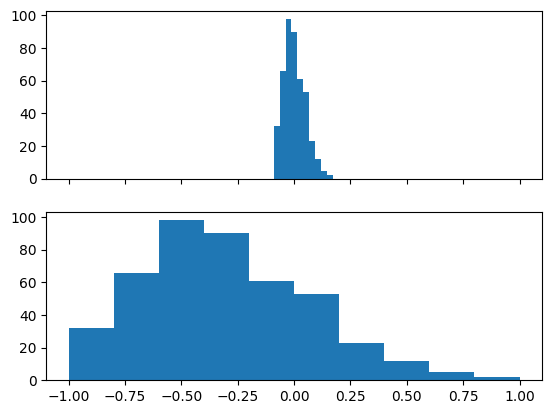

In [ ]:
#Es mejor con datos uniformemente distribuidos

max_raw = max(raw)
min_raw = min(raw)
scaled = ((2*raw - min_raw -max_raw)/(max_raw-min_raw))

fig, axs = plt.subplots(nrows=2, ncols=1, sharex=True)
axs[0].hist(raw) #Histograma datos raw
axs[1].hist(scaled) #Histograma datos escalados

plt.show()

In [ ]:
#Modelo para entrenamiento

# Medir el entrenamiento sobre los datos raw
def train_raw():
  linear_model.LinearRegression().fit(raw, y) #Toma métodos de sklearn. Se ajusta a los datos raw y a una variable y declarada en la primer celda al cargar el dataset

# Medir el entrenamiento sobre los datos escalados
def train_scaled():
  linear_model.LinearRegression().fit(scaled, y)


In [ ]:
raw_time = timeit.timeit(train_raw, number=100) #Calcula el tiempo con 100 ciclos
scaled_time = timeit.timeit(train_scaled, number=100)
print('train raw : {}'.format(raw_time))
print('train scaled : {}'.format(scaled_time)) #Evidenciar reduccion en el tiempo de ejecución

train raw : 0.10697848399999543
train scaled : 0.12315710999999396


##Z-score

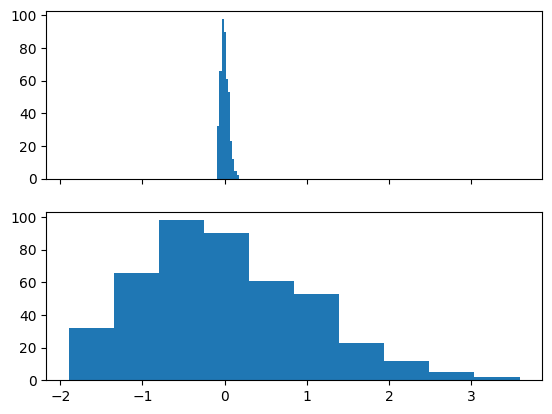

In [ ]:
#Es mejor con datos distribuidos normalmente (Campana de Gauss)
dstd_raw = np.std(raw)
mean_raw = raw.mean()
z_scaled = ((raw - mean_raw)/(dstd_raw))

fig, axs = plt.subplots(nrows=2, ncols=1, sharex=True)
axs[0].hist(raw) #Histograma datos raw
axs[1].hist(z_scaled) #Histograma datos escalados

plt.show()

In [ ]:
#Modelo para entrenamiento

# Medir el entrenamiento sobre los datos raw
def train_raw():
  linear_model.LinearRegression().fit(raw, y) #Toma métodos de sklearn. Se ajusta a los datos raw y a una variable y declarada en la primer celda al cargar el dataset

# Medir el entrenamiento sobre los datos escalados
def train_z_scaled():
  linear_model.LinearRegression().fit(z_scaled, y)

In [ ]:
raw_time = timeit.timeit(train_raw, number=100) #Calcula el tiempo con 100 ciclos
z_scaled_time = timeit.timeit(train_z_scaled, number=100)
print('train raw : {}'.format(raw_time))
print('train z-score : {}'.format(z_scaled_time)) #Evidenciar reduccion en el tiempo de ejecución

train raw : 0.1547802310000037
train z-score : 0.2257611389999994


#Transformaciones no lineales

##Tranformación con *tanh(x)*

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/cars.csv')
df.head(3)

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,False,gasoline,2.5,...,True,True,True,False,True,False,True,True,True,16
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,False,gasoline,3.0,...,True,False,False,True,True,False,False,False,True,83
2,Subaru,Forester,automatic,red,402000,2001,gasoline,False,gasoline,2.5,...,True,False,False,False,False,False,False,True,True,151


<Axes: >

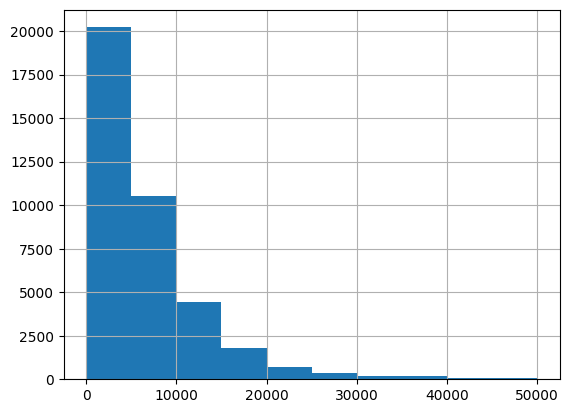

In [ ]:
df.price_usd.hist()

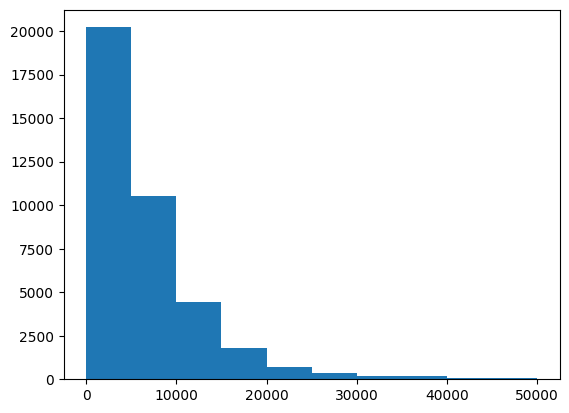

In [ ]:
plt.hist(df['price_usd'])
plt.show()

<Axes: >

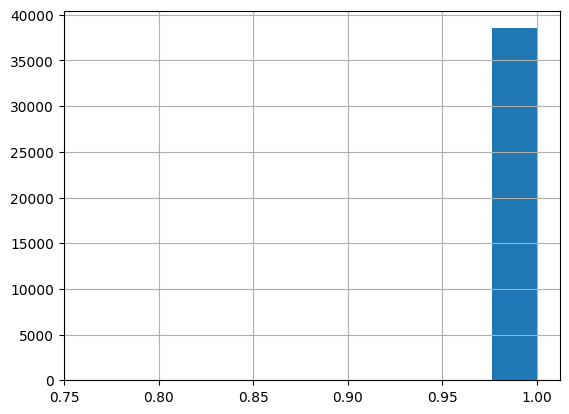

In [ ]:
df.price_usd.apply(lambda x: np.tanh(x)).hist()

<Axes: >

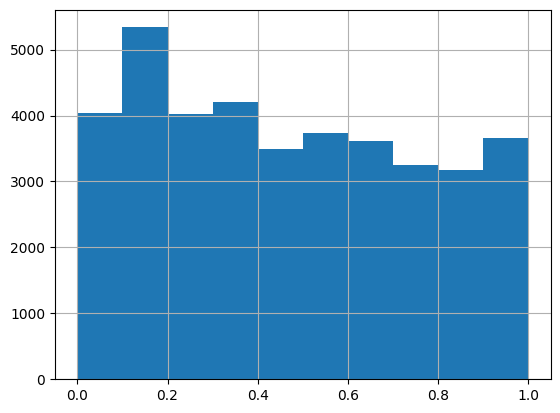

In [ ]:
a = 10000
df.price_usd.apply(lambda x: np.tanh(x/a)).hist()

<Axes: >

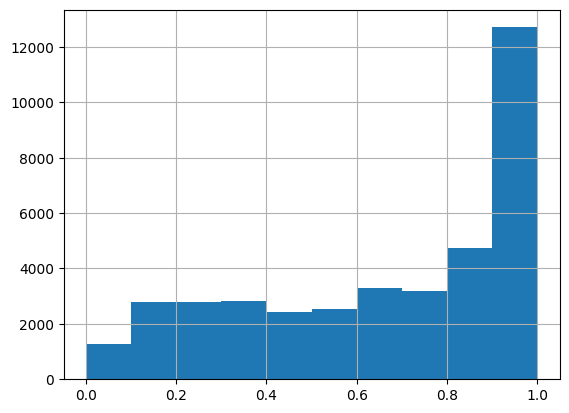

In [ ]:
a = 5000
df.price_usd.apply(lambda x: np.tanh(x/a)).hist()

#Procesamiento para variables categóricas con Python

In [ ]:
import sklearn.preprocessing as prepocessing #Contiene las reglas de preprocesamiento para categóricos y no categóricos
encoder = prepocessing.OneHotEncoder(handle_unknown='ignore') #Crear método de codificación de categorías

In [ ]:
df.head(3)

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,False,gasoline,2.5,...,True,True,True,False,True,False,True,True,True,16
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,False,gasoline,3.0,...,True,False,False,True,True,False,False,False,True,83
2,Subaru,Forester,automatic,red,402000,2001,gasoline,False,gasoline,2.5,...,True,False,False,False,False,False,False,True,True,151


In [ ]:
pd.get_dummies(df['engine_type']) #Conversión one-hot para variables categóricas a numéricas

,diesel,electric,gasoline
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
38526,0,0,1
38527,1,0,0
38528,0,0,1
38529,0,0,1


In [ ]:
encoder.fit(df[['engine_type']].values) #Ajustar encoder para la columna 'engine_type'

OneHotEncoder(handle_unknown='ignore')

In [ ]:
encoder.transform([['gas'],['diesel'],['gasoline']]).toarray() #Confirma el encoder al convertir un arreglo de categorias a una matriz de '1' y '0'. Gas: 000, diesel:100, gasoline:001

array([[0., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.]])

In [ ]:
encoder.fit(df[['year_produced']].values) #Ajustar encoder para la columna 'year_produced'

OneHotEncoder(handle_unknown='ignore')

In [ ]:
encoder.transform([[2016],[2009],[190]]).toarray()

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])